In [ ]:
import cv2, pickle
from PIL import Image, ImageFilter
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from skimage import io, color, feature, filters, restoration, exposure
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tqdm import tqdm
from skimage import util, io, transform

## Original Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


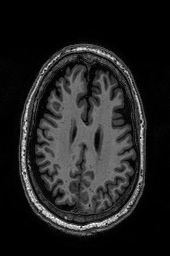

In [ ]:
image = Image.open("Axial/AD/AD002_S_0816a077.png")
image

## Gaussian Blurring

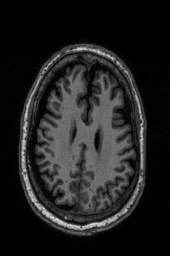

In [ ]:
# Apply GaussianBlur filter with radius of 2 pixels
denoise_image = image.filter(ImageFilter.GaussianBlur(radius=0.5))
denoise_image

## Edge Enhancement

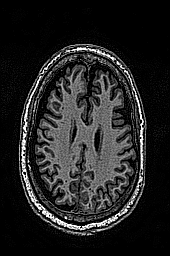

In [ ]:
# Apply edge enhancement
edge_enhance_image = denoise_image.filter(ImageFilter.EDGE_ENHANCE)
edge_enhance_image

## Texture Analysis

In [ ]:
texture_analysis_org = pd.DataFrame(columns=['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation'])

### Texture Analysis for Original Image

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

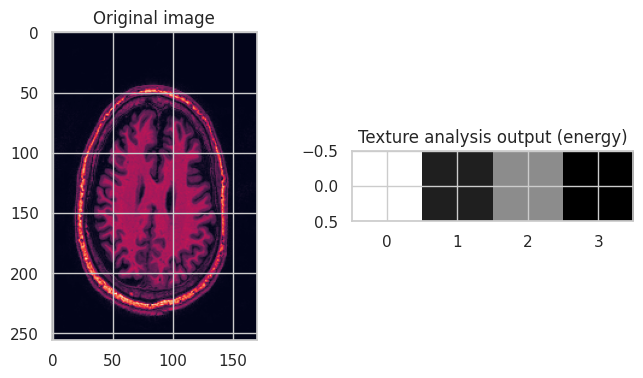

In [ ]:
# Load the image
image = io.imread("Axial/AD/AD002_S_0816a077.png")

# Convert the image to grayscale
gray_image = image

# Compute the GLCM
glcm = feature.greycomatrix(gray_image, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

# Compute texture features from the GLCM
contrast = feature.greycoprops(glcm, 'contrast')
dissimilarity = feature.greycoprops(glcm, 'dissimilarity')
homogeneity = feature.greycoprops(glcm, 'homogeneity')
energy = feature.greycoprops(glcm, 'energy')
correlation = feature.greycoprops(glcm, 'correlation')


### storing features
texture_analysis_org['contrast'] = contrast[0]
texture_analysis_org['dissimilarity'] = dissimilarity[0]
texture_analysis_org['homogeneity'] = homogeneity[0]
texture_analysis_org['energy'] = energy[0]
texture_analysis_org['correlation'] = correlation[0]

texture_analysis_org.set_index(pd.Index(['color label 0', 'color label 1', 'color label 2', 'color label 3']), inplace=True)

# Display the output image
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].imshow(image)
ax[0].set_title("Original image")
plt.imshow(energy, cmap='gray')
ax[1].set_title("Texture analysis output (energy)")
plt.show()

### Texture Analysis for Edge Enhanced Image

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

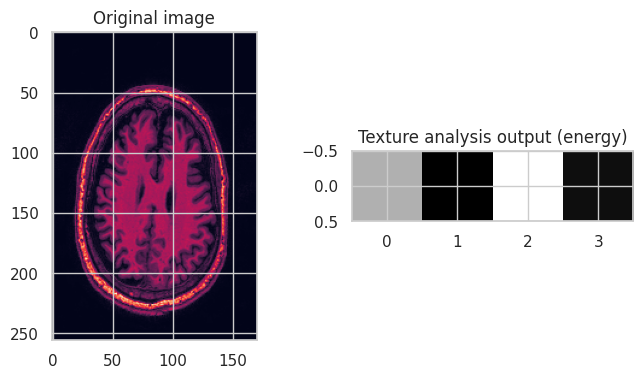

In [ ]:
texture_analysis_processed = pd.DataFrame(columns=['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation'])
# Convert the image to grayscale
gray_image = np.array(edge_enhance_image)

# Compute the GLCM
glcm = feature.greycomatrix(gray_image, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

# Compute texture features from the GLCM
contrast = feature.greycoprops(glcm, 'contrast')
dissimilarity = feature.greycoprops(glcm, 'dissimilarity')
homogeneity = feature.greycoprops(glcm, 'homogeneity')
energy = feature.greycoprops(glcm, 'energy')
correlation = feature.greycoprops(glcm, 'correlation')


### storing features
texture_analysis_processed['contrast'] = contrast[0]
texture_analysis_processed['dissimilarity'] = dissimilarity[0]
texture_analysis_processed['homogeneity'] = homogeneity[0]
texture_analysis_processed['energy'] = energy[0]
texture_analysis_processed['correlation'] = correlation[0]

texture_analysis_processed.set_index(pd.Index(['color label 0', 'color label 1', 'color label 2', 'color label 3']), inplace=True)


# Display the output image
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].imshow(image)
ax[0].set_title("Original image")
ax[1].imshow(energy, cmap='gray')
ax[1].set_title("Texture analysis output (energy)")
plt.show()

### Texture Features of Original AD Image

In [ ]:
texture_analysis_org.style.background_gradient(cmap='viridis')

,contrast,dissimilarity,homogeneity,energy,correlation
color label 0,307.800758,8.382951,0.444851,0.271370,0.923716
color label 1,429.846711,9.987284,0.431385,0.266480,0.893655
color label 2,232.481430,7.121892,0.449282,0.268868,0.942321
color label 3,436.109015,9.979162,0.430197,0.265803,0.892105


### Texture Features of Processed (Edge Enhanced) AD Image

In [ ]:
texture_analysis_processed.style.background_gradient(cmap='viridis')

,contrast,dissimilarity,homogeneity,energy,correlation
color label 0,1512.508413,18.957840,0.392852,0.331357,0.750479
color label 1,2010.201648,22.408122,0.372755,0.317573,0.669124
color label 2,1109.468005,16.173379,0.402626,0.337597,0.816734
color label 3,2007.269103,22.374243,0.373411,0.318701,0.669607


### **DATA PREPROCESSING**

#### original Image ---> Gaussian Blurring (Denoising) ---> Edge Enhancement ---> Intensity Normalization ---> Contrast Enhancement

In [ ]:
def refine_image(image):
    image = Image.open(image)

    ## denoising
    denoise_image = image.filter(ImageFilter.GaussianBlur(radius=0.5))

    ## Edge Enhancement
    edge_enhance_image = denoise_image.filter(ImageFilter.EDGE_ENHANCE)

    ## Intensity Normalization
    image_norm = exposure.equalize_hist(np.array(edge_enhance_image))

    ## Contrast Enhncement
    image_contrast = exposure.rescale_intensity(image_norm)

    return image_contrast


In [ ]:
# This cell should be run only when preprocessing needs to be done again

AD_original = glob('Axial/AD/*')
CI_original = glob('Axial/CI/*')
CN_original = glob('Axial/CN/*')

AD_processed = []
CI_processed = []
CN_processed = []

for i in range(len(CI_original)):
    try:
        img = AD_original[i]
        AD_processed.append(refine_image(img))
    except:
        pass

    try:
        img = CI_original[i]
        CI_processed.append(refine_image(img))
    except:
        pass

    try:
        img = CN_original[i]
        CN_processed.append(refine_image(img))
    except:
        pass


In [ ]:
# This cell will store the preprocessed images in the form of pickle; if already stored, don't run again
import pickle
with open('AD_processed_dump.pkl', 'wb') as f:
    pickle.dump(AD_processed, f)

with open('CI_processed_dump.pkl', 'wb') as f:
    pickle.dump(CI_processed, f)

with open('CN_processed_dump.pkl', 'wb') as f:
    pickle.dump(CN_processed, f)

In [ ]:
# Loading the saved pickle data
with open('processed_data/AD_processed_dump.pkl', 'rb') as f:
    AD_processed_loaded = pickle.load(f)

with open('processed_data/CI_processed_dump.pkl', 'rb') as f:
    CI_processed_loaded = pickle.load(f)

with open('processed_data/CN_processed_dump.pkl', 'rb') as f:
    CN_processed_loaded = pickle.load(f)

In [ ]:
len(AD_processed_loaded), len(CI_processed_loaded), len(CN_processed_loaded)

(1124, 2590, 1440)

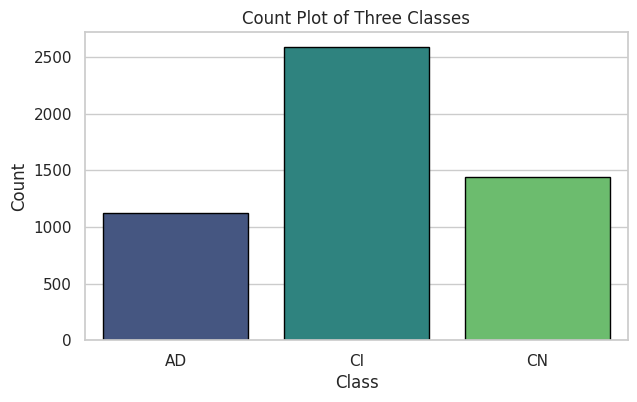

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming AD_processed_loaded, CI_processed_loaded, CN_processed_loaded are your datasets
AD_count = len(AD_processed_loaded)
CI_count = len(CI_processed_loaded)
CN_count = len(CN_processed_loaded)

# Create a list of class labels and their corresponding counts
class_labels = ['AD', 'CI', 'CN']
class_counts = [AD_count, CI_count, CN_count]

# Create a count plot with black edge
sns.set(style="whitegrid")
plt.figure(figsize=(7,4))
sns.barplot(x=class_labels, y=class_counts, palette="viridis", edgecolor='black')

plt.title('Count Plot of Three Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

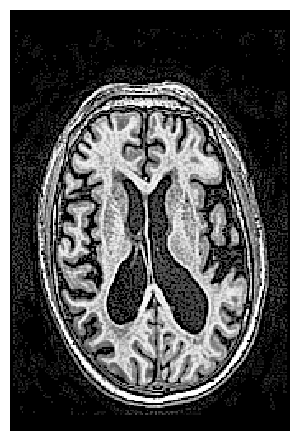

In [ ]:
io.imshow(AD_processed_loaded[0])
plt.axis('off')
io.show()

#### Original Vs Preprocessed Data Overview

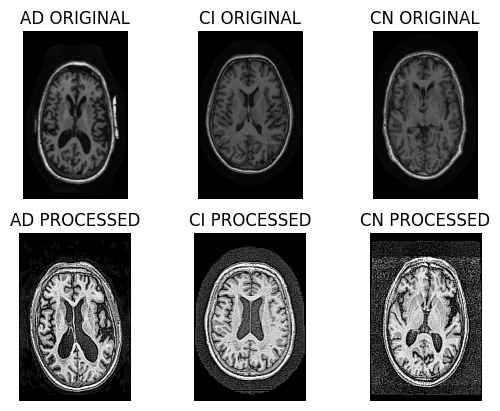

In [ ]:
# Load the images
img1 = Image.open(AD_original[0])
img2 = Image.open(CI_original[0])
img3 = Image.open(CN_original[0])

img1 = np.array(img1)
img2 = np.array(img2)
img3 = np.array(img3)

# Resize the images
img1 = transform.resize(img1, img3.shape)
img2 = transform.resize(img2, img3.shape)

# Load the images
proc_img1 = AD_processed_loaded[0]
proc_img2 = CI_processed_loaded[0]
proc_img3 = CN_processed_loaded[0]

# Resize the images
proc_img1 = transform.resize(proc_img1, proc_img3.shape)
proc_img2 = transform.resize(proc_img2, proc_img3.shape)

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=2, ncols=3)

# Display the images and set the titles
axes[0,0].imshow(img1, cmap='gray')
axes[0,0].set_title('AD ORIGINAL')
axes[0,0].axis('off')

axes[0,1].imshow(img2,  cmap='gray')
axes[0,1].set_title('CI ORIGINAL')
axes[0,1].axis('off')

axes[0,2].imshow(img3, cmap='gray')
axes[0,2].set_title('CN ORIGINAL')
axes[0,2].axis('off')


# Display the images and set the titles
axes[1,0].imshow(proc_img1, cmap='gray')
axes[1,0].set_title('AD PROCESSED')
axes[1,0].axis('off')

axes[1,1].imshow(proc_img2,  cmap='gray')
axes[1,1].set_title('CI PROCESSED')
axes[1,1].axis('off')

axes[1,2].imshow(proc_img3, cmap='gray')
axes[1,2].set_title('CN PROCESSED')
axes[1,2].axis('off')

# Display the figure
plt.show()

## Feature Extraction: VGG16

This step involved the extraction of image salient features using pretrained VGG16 model. This aims to reduce the complexity of images by conserving only relevant features using VGG knowledge base.

In [ ]:
# images = AD_processed_loaded + CI_processed_loaded + CN_processed_loaded

# load the model
model = VGG16()
# restructure the model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# summary
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Resizing images & Additional Preprocessing

This step involves resizing of images and increasing the colour channel from 2 to 3. From variable image shapes to (224,224,3) which is the desired input shape for VGG16 model. To add the third channel, the padding is done by adding 0s to the last channel. Further, cropping is done.

In [ ]:
def _compatible(list_of_images):
  new_set_images = []
  for i in tqdm(range(len(list_of_images))):
    img_array_2d = list_of_images[i]

    # Expand the dimensions to create a 3D image
    img_array_3d = np.expand_dims(img_array_2d, axis=-1)

    # Repeat the values along the new dimension (here, assuming 3 channels for RGB)
    img_array_3d = np.repeat(img_array_3d, 3, axis=-1)

    # Define the target size
    target_size = (224, 224)

    # Calculate the padding values for height and width
    pad_height = (target_size[0] - img_array_3d.shape[0]) // 2
    pad_width = (target_size[1] - img_array_3d.shape[1]) // 2

    if pad_height<0:
      pad_height=0
    if pad_width<0:
      pad_width=0

    # Apply padding
    padded_image = np.pad(img_array_3d, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant')


    img = padded_image  # Replace this with your actual image array


    # Define the target size
    target_size = (224, 224, 3)

    # Calculate the amount of pixels to be removed from each edge
    remove_pixels_vertical = (img.shape[0] - target_size[0]) // 2
    remove_pixels_horizontal = (img.shape[1] - target_size[1]) // 2

    if remove_pixels_horizontal != 0 and remove_pixels_vertical !=0:
      cropped_image = img[remove_pixels_vertical:-(remove_pixels_vertical), remove_pixels_horizontal:-(remove_pixels_horizontal), :]
    elif remove_pixels_horizontal == 0:
      cropped_image = img[remove_pixels_vertical:-(remove_pixels_vertical),:,:]
    elif remove_pixels_vertical == 0:
      cropped_image = img[:,:,remove_pixels_horizontal:-(remove_pixels_horizontal)]

    if cropped_image.shape[0]!=224 and cropped_image.shape[1]!=224:
      print("something wrong")

    new_set_images.append(cropped_image)

  return new_set_images

In [ ]:
AD_images = _compatible(AD_processed_loaded)
with open('processed_data_reshaped/AD_processed_reshaped.pkl', 'wb') as f:
    pickle.dump(AD_images, f)

100%|██████████| 1124/1124 [00:01<00:00, 595.48it/s]


In [ ]:
CI_images = _compatible(CI_processed_loaded)
with open('processed_data_reshaped/CI_processed_reshaped.pkl', 'wb') as f:
    pickle.dump(CI_images, f)

100%|██████████| 2590/2590 [00:04<00:00, 572.42it/s]


In [ ]:
CN_images = _compatible(CN_processed_loaded)
with open('processed_data_reshaped/CN_processed_reshaped.pkl', 'wb') as f:
    pickle.dump(CN_images, f)

100%|██████████| 1440/1440 [00:02<00:00, 677.58it/s]


In [ ]:
with open('processed_data_reshaped/AD_processed_reshaped.pkl', 'rb') as f:
    AD_processed_reshaped = pickle.load(f)

with open('processed_data_reshaped/CI_processed_reshaped.pkl', 'rb') as f:
    CI_processed_reshaped = pickle.load(f)

with open('processed_data_reshaped/CN_processed_reshaped.pkl', 'rb') as f:
    CN_processed_reshaped = pickle.load(f)

#### Feature Extraction AD Images

In [ ]:
features_AD, features_CI, features_CN = [], [], []
from tqdm import tqdm

# FEATURE EXTRACTION AD IMAGES
for image in tqdm(AD_processed_reshaped):
    img = image
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)

    # extract features
    feature = model.predict(img, verbose=0)
    features_AD.append(feature)

In [ ]:
with open('features_extracted/features_AD.pkl', 'wb') as f:
    pickle.dump(features_AD, f)

#### Feature Extraction CI Images

In [ ]:
# FEATURE EXTRACTION CI IMAGES
for image in tqdm(CI_processed_reshaped):
    img = image
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)

    # extract features
    feature = model.predict(img, verbose=0)
    features_CI.append(feature)

100%|██████████| 2590/2590 [03:09<00:00, 13.65it/s]


In [ ]:
with open('features_extracted/features_CI.pkl', 'wb') as f:
    pickle.dump(features_CI, f)

#### Feature Extraction CN Images

In [ ]:
# FEATURE EXTRACTION CN IMAGES
for image in tqdm(CN_processed_reshaped):
    img = image
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)

    # extract features
    feature = model.predict(img, verbose=0)
    features_CN.append(feature)

100%|██████████| 1440/1440 [01:49<00:00, 13.19it/s]


In [ ]:
with open('features_extracted/features_CN.pkl', 'wb') as f:
    pickle.dump(features_CN, f)

In [ ]:
with open('features_extracted/features_AD.pkl', 'rb') as f:
    features_AD = pickle.load(f)

with open('features_extracted/features_CI.pkl', 'rb') as f:
    features_CI = pickle.load(f)

with open('features_extracted/features_CN.pkl', 'rb') as f:
    features_CN = pickle.load(f)

In [ ]:
print("Total number of data samples for class AD: ", len(features_AD))
print("Total number of data samples for class CI: ", len(features_CI))
print("Total number of data samples for class CN: ", len(features_CN))

Total number of data samples for class AD:  1124
Total number of data samples for class CI:  2590
Total number of data samples for class CN:  1440


In [ ]:
print("Shape of Image after feature extraction: ", features_CI[0].shape)

Shape of Image after feature extraction:  (1, 4096)


In [ ]:
# Further Steps

# 1. Data split into train and test set
# 2. Design Models
# 3. Train Models
# 4. Evaluate their performance